pandas是基于NumPy数组构建的，特别是基于数组的函数和不使用for循环的数据处理。

pandas是专门为[处理表格]和[混杂数据]设计的。而NumPy更适合处理统一的数值数组数据。

Pandas以DataFrame为核心，有以下基本内容：
1. 重建索引 
    根据需要对整体数据进行操作，以索引进行操作。
    
2. 删除条目
    主要是drop方法的应用。注意轴参数的使用，默认在行上操作。
    
3. 索引、过滤和选择 【重要！！！】
    基本索引方法、标签索引
    
4. 数学与统计 【重要！！】
    描述性统计、常见计算与统计、排序与排名

# 一、Series: 带标签（索引index）的数组（values）

通过[索引]进行数据操作： 索引、切片等; 
数据自动对齐等。

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame

s1 = Series([1,5,-2,6],index=['a','b','c','d'])
s1

a    1
b    5
c   -2
d    6
dtype: int64

In [5]:
s1['a']

1

# 二、DataFrame: 高维的Series。

多列(columns)数据类型可以不同。对数据的操作通过对索引操作完成（lable和data内在关联）。

## 1. 重建索引 reindex

DataFrame中可以使用reindex更改行、列索引，也可以同时改变二者，进而达到对数据的处理。

In [8]:
df = DataFrame(np.arange(9).reshape(3,3),
                           index = ['b','c','a'],
                           columns = ['Ohio','Texas','California'])
df

,Ohio,Texas,California
b,0,1,2
c,3,4,5
a,6,7,8


In [9]:
df2 = df.reindex(['a','b','c','d']) #重塑索引
df2

,Ohio,Texas,California
a,6.0,7.0,8.0
b,0.0,1.0,2.0
c,3.0,4.0,5.0
d,NaN,NaN,NaN


## 2. 删除轴上数据
（不改变原对象。如果需要改变，添加参数inplace=True）

In [10]:
df

,Ohio,Texas,California
b,0,1,2
c,3,4,5
a,6,7,8


In [11]:
df.drop('a') #删除指定轴的数据。默认axis=0，即行。

,Ohio,Texas,California
b,0,1,2
c,3,4,5


In [14]:
df.drop('Ohio',axis=1) #传递axis=1 或 axis=''columns，从列删除数据。

,Texas,California
b,1,2
c,4,5
a,7,8


## 3. 索引、选择与过滤

### 3.1 基础索引

In [15]:
data = DataFrame(np.arange(16).reshape(4,4),
                              index=['Ohio', 'Colorado', 'Utah', 'New York'],
                              columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [16]:
data['two'] #注意，这里不需要指定轴1

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [19]:
data[['four','one']]

,four,one
Ohio,3,0
Colorado,7,4
Utah,11,8
New York,15,12


In [20]:
data[:2] #索引前2行。对行有效，是因为DF的index有默认值0,1,...,n-1.

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


### 3.2 loc和iloc选择数据

使用[轴标签（loc）]或[整数索引（iloc）]，从DataFrame选择[行和列的子集]。
loc根据轴标签（标签实际名称）进行索引；iloc根据标签位置进行整数索引。

注意：loc和iloc中[行是必选参数]。要想选择列，必须先设置对应的行。一般选取一列时需要完整的一列，即行全选。[ : ,val/where]

更详细的见P142。

In [24]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [31]:
data.iloc[ : , :3 ] # DataFrame.iloc[ A , B ]，其中A,B分别为行、列标签的切片，可以使用 : : （即起、止、步长），注意逗号隔开，不需要括号。

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [32]:
data.iloc[:,:3][data.three>5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


### 3.3 算术

使用填充值fill_value和广播（broadcast）

#### （1）对于两个不同规格的表格算术，不对齐的部分会因为取并集而产生NaN。

可以使用填充值的办法，在做算术运算时[先进行相应填充再运算]

In [33]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                                 columns=list('abcd'))

df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                                 columns=list('abcde'))

df2.loc[1, 'b'] = np.nan #loc标签索引

In [34]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [35]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [36]:
df1+df2 #直接相加会产生NaN值

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.add(df2,fill_value=0) #使用算术方法（具体见P148）,第一个参数为运算对象（可用r反转运算位置），第二个为填充的值。

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


#### （2）DF和S之间的广播

In [47]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                                      columns=list('bde'),
                                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])

series = frame.iloc[0] #选取第一行。

series2 = frame['d'] #若想使用loc或iloc方法，必选参数行要进行设置。即 series2 = frame.loc[ : ,'d' ]

In [39]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [40]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [48]:
series2

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

默认情况下，DF和S之间的数学操作会将[S的索引]和[DF的列]进行匹配，并广播到各行：

In [41]:
frame - series  # 相当于对于每行进行了操作：减去某一行的值。

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [49]:
frame - series2

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


根据默认原则，会生成上述表。

如果想在列上进行广播（对每列进行操作，比如每列减去某一列的值），必须使用算术方法(Algorithm Method)，并且指定[匹配轴]（注意不是操作轴。比如这里相对列进行操作，即[对该列上每一行]进行操作，匹配轴就是行axis=0 / axis = 'index' 。）

In [50]:
frame.sub(series2,axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


总结：

1. 在loc/iloc中，行是必选参数。选择行相对容易，一个参数就可以[A]；选择列时，必须先指定好需要的行[，B]。

2. 在DF和S的广播中，行广播以列为匹配轴，列广播以行为匹配轴。行广播较为直接；列广播需要指定匹配轴axis=0。要建立起结构性思维，有匹配轴的概念。对行（列）的操作，是对该方向上的每一列（行）进行的操作。

## 4.函数应用和映射

apply方法将函数应用到一行或一列的一维数组上（或数据子集）。

In [54]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.813981,-0.219397,0.901628
Ohio,0.051315,0.732665,0.414621
Texas,-0.422839,-1.125083,0.913169
Oregon,0.678150,-0.815767,-0.920214


In [52]:
f = lambda x: x.max() - x.min()
frame.apply(f)

#根据frame.col的结构，这里默认f将被DF的每列调用一次。结果返回以frame的列做索引的Series.

#如果要给行使用，匹配轴选择 axis=1 / axis='columns‘

b    2.422146
d    1.225611
e    1.302597
dtype: float64

In [55]:
frame.apply(f,axis=1)

Utah      1.121025
Ohio      0.681349
Texas     2.038252
Oregon    1.598364
dtype: float64

对于统计计算，DF有相应的方法（如sum和mean）。apply有更多高级用法。

传递给apply的函数并不一定要返回一个标量值，还可以返回由多个值组成的Series：

In [56]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

frame.apply(f)
#默认在列上使用。如果要统计每行的值，要选择列作为匹配轴。

,b,d,e
min,-0.422839,-1.125083,-0.920214
max,0.813981,0.732665,0.913169


总结：apply是一个非常灵活的函数，返回值可以是一个标量（返回的DF为S），可以是一个Series（返回的DF为DF）。

## 5.排序和排名

1. 按索引排序：sort_index(axis=,ascending=)
    axis选择按行还是列进行排序，ascending=False按降序排列。

2. 按值排序：sort_values(by=)
    将列名传给by参数。可以是一列或者多列。
    
3. rank排名：rank(axis=, ascending=, method=)
    rank是对数据个数总数进行分配名次。默认情况下分配平均排名（例如数据个数总数为奇数，排名会出现小数）。
    可以使用 method = ’max‘ 进行一般性的唯一性排名。
    

In [60]:
frame = pd.DataFrame(np.random.randn(12).reshape((3, 4)),
                                      index=['two','three', 'one'],
                                      columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
two,-0.746628,0.482861,-1.185241,0.201201
three,1.550611,-0.421913,-0.445675,1.095619
one,-0.002227,-0.453586,-2.824978,-0.775317


In [61]:
#按索引排序

frame.sort_index() #按照行索引进行升序排列。若要按照列索引进行排序，选择轴axis=1。

,d,a,b,c
one,-0.002227,-0.453586,-2.824978,-0.775317
three,1.550611,-0.421913,-0.445675,1.095619
two,-0.746628,0.482861,-1.185241,0.201201


In [64]:
#按列（值）排序

frame.sort_values(by='d') #列名col传给参数by。默认升序排列，ascending=True

,d,a,b,c
two,-0.746628,0.482861,-1.185241,0.201201
one,-0.002227,-0.453586,-2.824978,-0.775317
three,1.550611,-0.421913,-0.445675,1.095619


In [71]:
#排名

frame.rank(method='max',ascending=False) #进行降序排名

,d,a,b,c
two,3.0,1.0,2.0,2.0
three,1.0,2.0,1.0,1.0
one,2.0,3.0,3.0,3.0


## 6.描述性统计的概述与计算

默认归约轴为axis=0，即在列上操作：

数学方法中默认skipna=True，即跳过NaN值。

常用方法（详细方法见P159）：
1. 归约方法
    sum()  求和
    mean() 均值
    idxmin() \ idxmax() 最值的索引值
    
2. 积累型方法：
    cumsum() 累计和
    cumprod() 累计积
    
3. 其他方法：
    describe() 多个汇总统计 (没有axis参数)
    pct_change() 计算变化百分比

In [72]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                                 [np.nan, np.nan], [0.75, -1.3]],
                                 index=['a', 'b', 'c', 'd'],
                                 columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [73]:
#列上加和. 
df.sum() 

one    9.25
two   -5.80
dtype: float64

In [74]:
#行上加和. 匹配轴为列
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [80]:
#积累求和
df.cumsum() #每一列上的值为向上累加所得。

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [78]:
#描述性统计
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [81]:
df.pct_change() # 计算百分比

,one,two
a,NaN,NaN
b,4.071429,NaN
c,0.000000,0.000000
d,-0.894366,-0.711111


### 6.1相关性和协方差

方法:
    corr() 相关系数
    cov() 协方差

### 6.2唯一值、计数和成员属性

这些方法是对一维Series的操作。应用于DF每一列时，需要使用[apply方法]。

1. unique()    返回一个ndarray, 给出S中的唯一值
2. value_counts()    返回一个Series，对值出现的次数统计
3. isin()    返回布尔值S，成员属性检查。常用于过滤数据。

In [91]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
mask = obj.isin(['b','c'])
obj[mask]
#通过mask做中介过滤出条件值。之后可以再进行其他操作。

0    c
5    b
6    b
7    c
8    c
dtype: object

In [92]:
#对DF使用时，采用apply方法
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                                     'Qu2': [2, 3, 1, 2, 3],
                                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [95]:
result = data.apply(pd.value_counts).fillna(0)
result

#对每一列Series使用Value_counts的方法

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


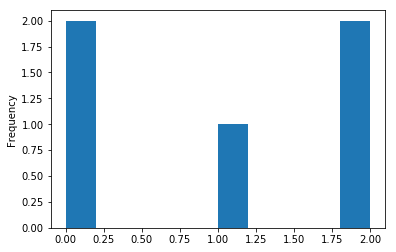

In [117]:
%matplotlib inline
result['Qu1'].plot.hist()